In [2]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file.
file_path = (r"C:\Users\ASUS\OneDrive\Desktop\dataset_google-news-scraper_AI2025-09-21_12-06-08-037.xlsx")

# Read the Excel file into a pandas DataFrame.
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to verify the import.
print(df.head(5))

                                               image  \
0  https://ca-times.brightspotcdn.com/dims4/defau...   
1  https://www.usatoday.com/gcdn/authoring/author...   
2  https://www.washingtonpost.com/wp-apps/imrs.ph...   
3  https://i.guim.co.uk/img/media/d944474c8a06d98...   
4  https://images.ft.com/v3/image/raw/https%3A%2F...   

                                               title               source  \
0  Contributor: The internet made us stupid. AI p...    Los Angeles Times   
1     What jobs will AI replace, and which are safe?            USA Today   
2  Artificial intelligence ushers in a golden age...  The Washington Post   
3  Chatbot site depicting child sexual abuse imag...         The Guardian   
4  ‘Stargate of China’ plan emerges to challenge ...      Financial Times   

                        sourceUrl               publishedAt  \
0         https://www.latimes.com  2025-09-21T10:00:00.000Z   
1        https://www.usatoday.com  2025-09-21T09:11:41.000Z   
2  https://

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Run these lines once to download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your dataframe and 'text' is the colomn you're working with

# 1. Remove missing rows
df_processed = df.dropna(subset=['title']).copy()

# 2. Tokenize it
df_processed['title_tokenized'] = df_processed['title'].apply(lambda x: word_tokenize(str(x)))

# 3. Make every text lowercase
df_processed['title_lower'] = df_processed['title'].str.lower()

# 4. Remove special characters
df_processed['title_no_special_chars'] = df_processed['title_lower'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', x))

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df_processed['title_tokenized_no_special'] = df_processed['title_no_special_chars'].apply(lambda x: word_tokenize(x))
df_processed['title_no_stopwords'] = df_processed['title_tokenized_no_special'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the head of the DataFrame with the new columns
print(df_processed[['title', 'title_tokenized', 'title_lower', 'title_no_special_chars', 'title_no_stopwords']].head())
print(df.head())

                                               title  \
0  Contributor: The internet made us stupid. AI p...   
1     What jobs will AI replace, and which are safe?   
2  Artificial intelligence ushers in a golden age...   
3  Chatbot site depicting child sexual abuse imag...   
4  ‘Stargate of China’ plan emerges to challenge ...   

                                     title_tokenized  \
0  [Contributor, :, The, internet, made, us, stup...   
1  [What, jobs, will, AI, replace, ,, and, which,...   
2  [Artificial, intelligence, ushers, in, a, gold...   
3  [Chatbot, site, depicting, child, sexual, abus...   
4  [‘, Stargate, of, China, ’, plan, emerges, to,...   

                                         title_lower  \
0  contributor: the internet made us stupid. ai p...   
1     what jobs will ai replace, and which are safe?   
2  artificial intelligence ushers in a golden age...   
3  chatbot site depicting child sexual abuse imag...   
4  ‘stargate of china’ plan emerges to challen

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Define the name for the new Excel file
output_file_path = 'AI1.xlsx'

# Save the processed DataFrame to a new Excel file.
# index=False ensures that the pandas index is not saved as a separate column.
df_processed.to_excel(output_file_path, index=False)

print(f"Successfully saved the updated DataFrame to {output_file_path}")

Successfully saved the updated DataFrame to AI1.xlsx


In [6]:
from textblob import TextBlob

# Load the preprocessed Excel file we created earlier.
preprocessed_file_path = 'AI1.xlsx'
df_final = pd.read_excel(preprocessed_file_path)

# --- Step 1: Re-join the tokenized words into a single string ---
# TextBlob works on strings, but our 'text_no_stopwords' column contains lists of words.
# We need to convert it back to a string first.
# The eval() function is used here because pandas sometimes reads lists as strings.
df_final['title_for_sentiment'] = df_final['title_no_stopwords'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))


# --- Step 2: Define functions to get sentiment polarity and category ---

# Function to calculate polarity
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Function to categorize the polarity
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# --- Step 3: Apply the functions to create new columns ---
# Create 'sentiment_score' column
df_final['sentiment_score'] = df_final['title_for_sentiment'].apply(get_sentiment_score)

# Create 'sentiment_category' column
df_final['sentiment_category'] = df_final['sentiment_score'].apply(get_sentiment_category)


# --- Step 4: Save the final DataFrame to a new Excel file ---
# We will drop the temporary column used for the analysis.
final_output_file = 'sentiment_analysis_resultsAI1.xlsx'
df_final.drop(columns=['title_for_sentiment'], inplace=True)
df_final.to_excel(final_output_file, index=False)

print(f"Successfully performed sentiment analysis and saved the results to {final_output_file}")

# Display the head of the final DataFrame to show the new columns
print(df_final[['title', 'title_no_stopwords', 'sentiment_score', 'sentiment_category']].head())

Successfully performed sentiment analysis and saved the results to sentiment_analysis_resultsAI1.xlsx
                                               title  \
0  Contributor: The internet made us stupid. AI p...   
1     What jobs will AI replace, and which are safe?   
2  Artificial intelligence ushers in a golden age...   
3  Chatbot site depicting child sexual abuse imag...   
4  ‘Stargate of China’ plan emerges to challenge ...   

                                  title_no_stopwords  sentiment_score  \
0  ['contributor', 'internet', 'made', 'us', 'stu...            -0.60   
1                  ['jobs', 'ai', 'replace', 'safe']             0.50   
2  ['artificial', 'intelligence', 'ushers', 'gold...            -0.15   
3  ['chatbot', 'site', 'depicting', 'child', 'sex...             0.50   
4  ['stargate', 'china', 'plan', 'emerges', 'chal...             0.00   

  sentiment_category  
0           Negative  
1           Positive  
2           Negative  
3           Positive  
4      

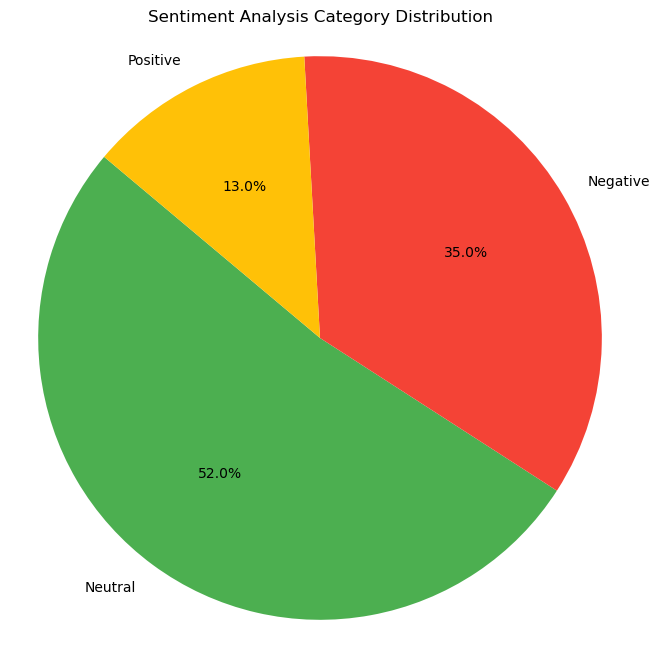

Sentiment Category Counts:
sentiment_category
Neutral     52
Negative    35
Positive    13
Name: count, dtype: int64


In [7]:
 import matplotlib.pyplot as plt

# Load the Excel file with sentiment analysis results
results_file_path = 'sentiment_analysis_resultsAI1.xlsx'
df_results = pd.read_excel(results_file_path)

# --- Step 1: Count the occurrences of each sentiment category ---
sentiment_counts = df_results['sentiment_category'].value_counts()

# --- Step 2: Plot the pie chart ---
plt.figure(figsize=(8, 8))  # Set the figure size for better readability
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336', '#FFC107'])

# --- Step 3: Add title and ensure the pie is a circle ---
plt.title('Sentiment Analysis Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# --- Step 4: Display the chart ---
plt.show()

# Optional: Print the counts for reference
print("Sentiment Category Counts:")
print(sentiment_counts)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Load the Excel file with the preprocessed text
file_path = 'sentiment_analysis_resultsAI1.xlsx'
df_topics = pd.read_excel(file_path)

# --- Step 1: Prepare the text data for vectorization ---
# The 'title_no_stopwords' column contains lists of words. We need to join them into a single string per row.
# The eval() function handles cases where the list was saved as a string like '["word1", "word2"]'.
df_topics['cleaned_title_joined'] = df_topics['title_no_stopwords'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

# Drop rows that might be empty after all the cleaning
df_topics.dropna(subset=['cleaned_title_joined'], inplace=True)


# --- Step 2: Vectorize the text using TF-IDF ---
# TF-IDF converts text into a matrix of numerical features, which is required for NMF.
# We are filtering out terms that are too frequent (in >95% of docs) or too rare (in <2 docs).
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_topics['cleaned_title_joined'])


# --- Step 3: Apply NMF to find 5 topics ---
num_topics = 5
# random_state is set for reproducibility of the results
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)


# --- Step 4: Display the topics with their top words ---
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        # Print the topic number and the top words
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print("-" * 50)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10  # You can change this number to see more or fewer words per topic

print("Top words for each of the 5 topics:")
display_topics(nmf_model, feature_names, num_top_words)

Top words for each of the 5 topics:
Topic #1:
ai says plan company 2025 stocks fears companies report chatgpt
--------------------------------------------------
Topic #2:
intelligence artificial algorithms companies stocks news investment replace customer using
--------------------------------------------------
Topic #3:
stock buy ultimate right ai growth 2023 prediction stocks years
--------------------------------------------------
Topic #4:
new book growth tools warns internet news video tech technology
--------------------------------------------------
Topic #5:
chatbot murder australian fears misuse aigenerated live animals video saving
--------------------------------------------------


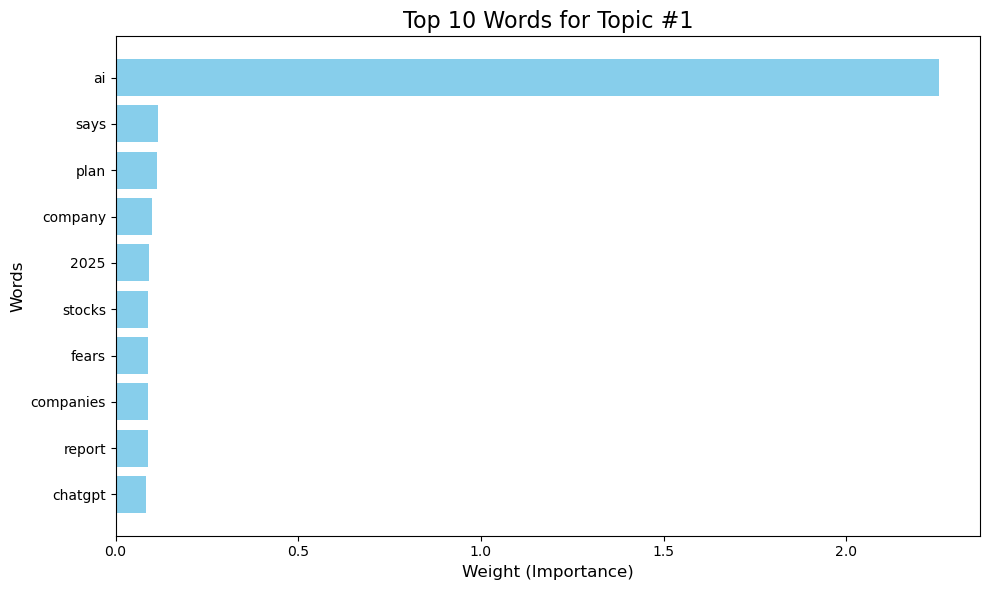

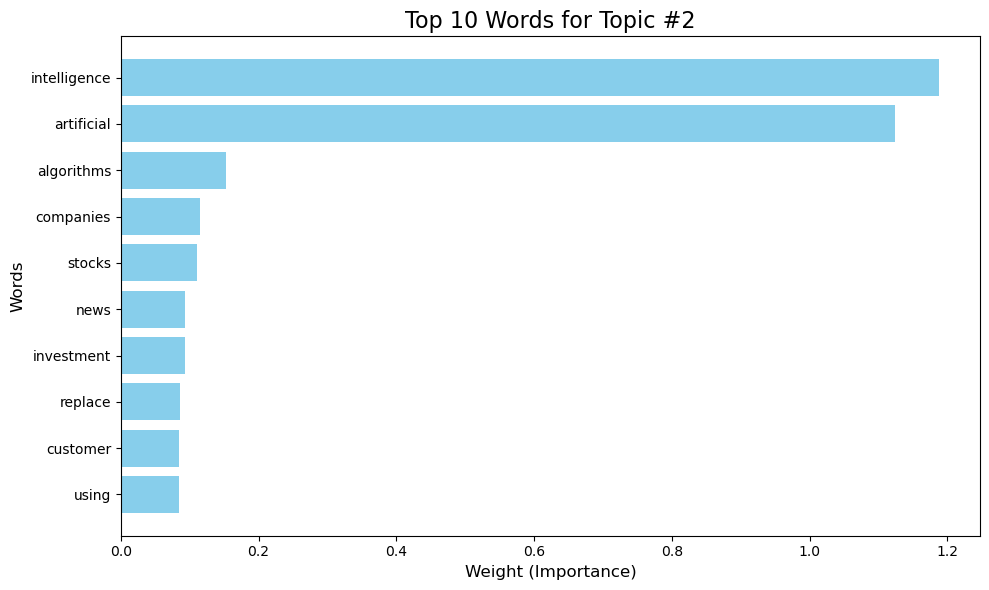

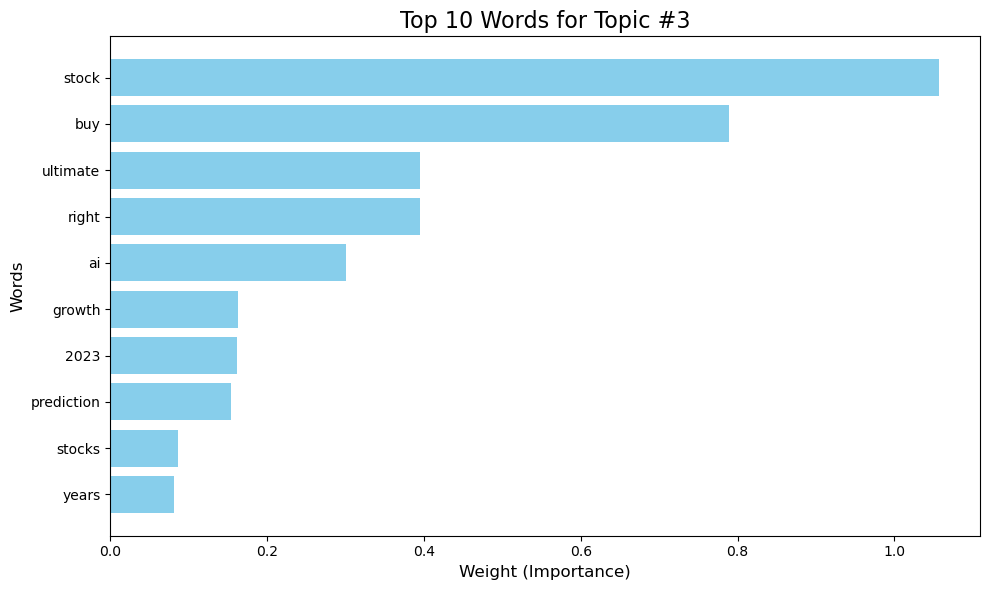

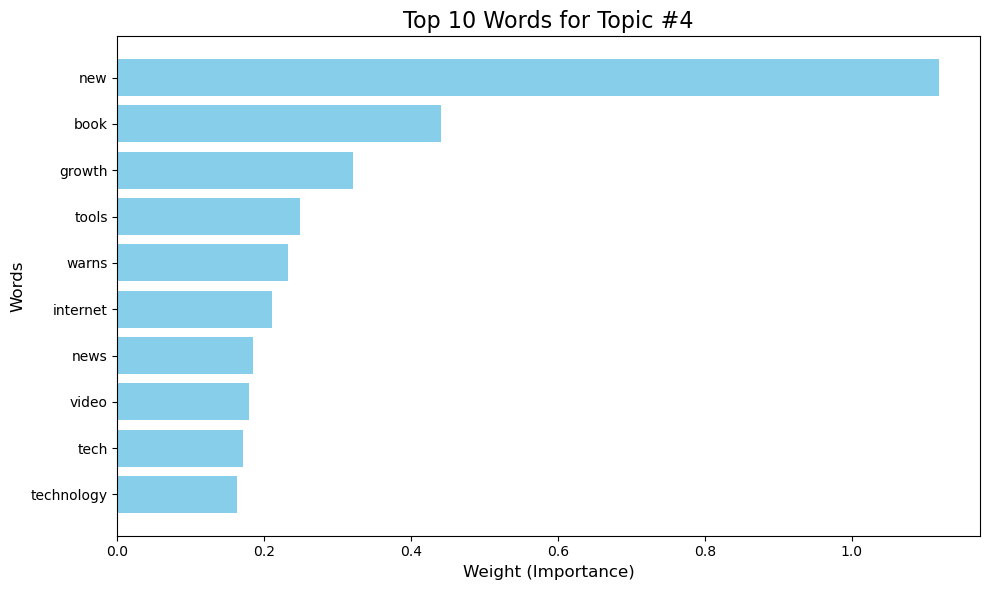

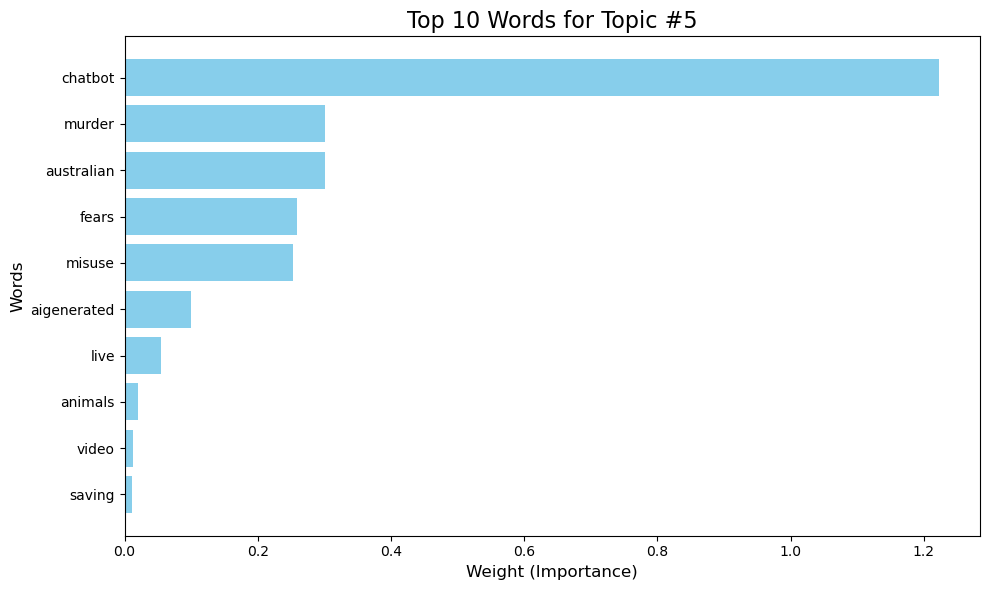

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Part 1: Re-run the NMF model to ensure variables are loaded ---
# (This is the same as the previous step, ensuring the code can run standalone)

# Load the data
file_path = 'sentiment_analysis_resultsAI1.xlsx'
df_topics = pd.read_excel(file_path)

# Prepare text
df_topics['cleaned_title_joined'] = df_topics['title_no_stopwords'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
df_topics.dropna(subset=['cleaned_title_joined'], inplace=True)

# Vectorize
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_topics['cleaned_title_joined'])

# Apply NMF
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# Get feature names
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# --- Part 2: Create a bar chart for each topic ---

# Loop through each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    # Get the top words and their weights for the current topic
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]
    
    # Create a horizontal bar plot
    plt.barh(top_words, top_weights, color='skyblue')
    
    # Invert the y-axis to have the most important word on top
    plt.gca().invert_yaxis()
    
    # Add titles and labels for clarity
    plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
    plt.xlabel('Weight (Importance)', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    
    # Ensure the layout is tight
    plt.tight_layout()
    
    # Display the plot
    plt.show()

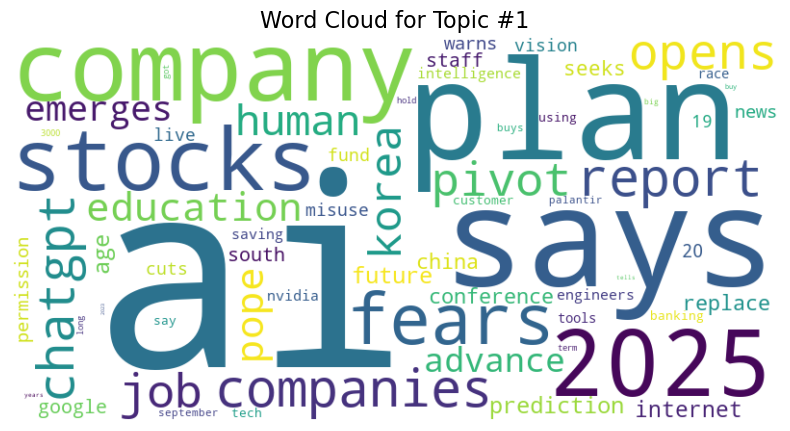

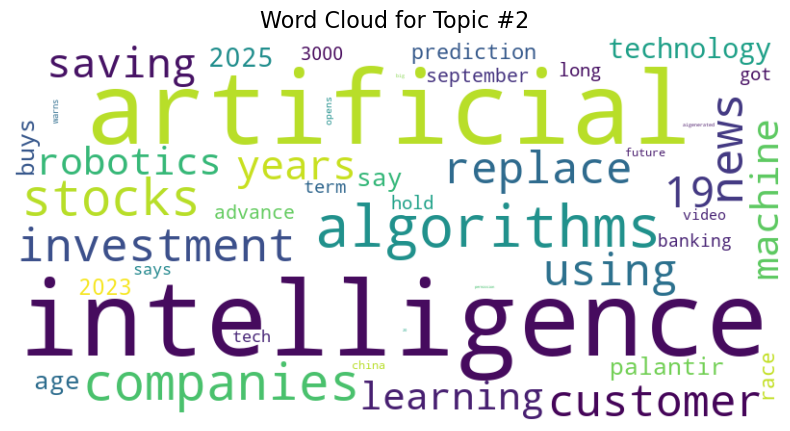

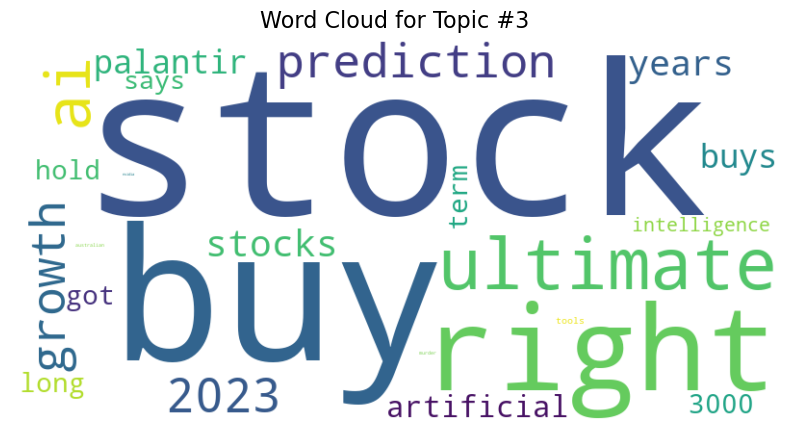

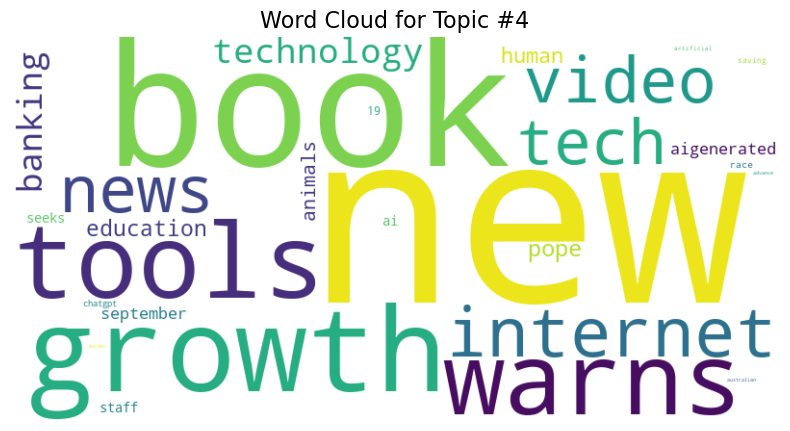

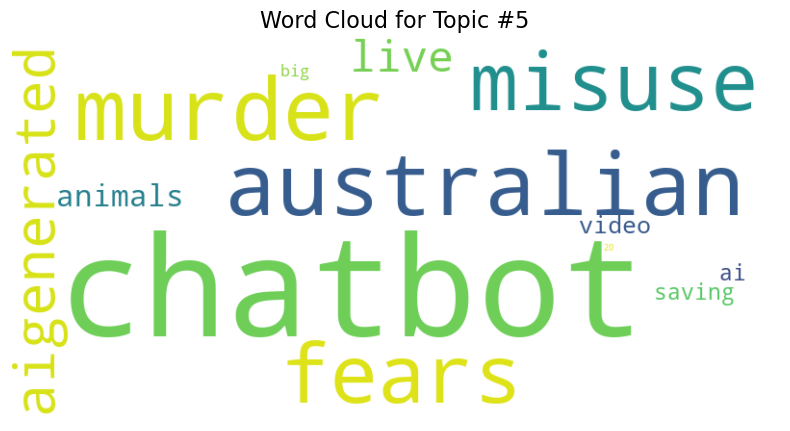

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# --- Part 1: Re-run the NMF model to ensure variables are loaded ---
# (This is the same as the previous step, ensuring the code can run standalone)

# Load the data
file_path = 'sentiment_analysis_resultsAI1.xlsx'
df_topics = pd.read_excel(file_path)

# Prepare text
df_topics['cleaned_title_joined'] = df_topics['title_no_stopwords'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
df_topics.dropna(subset=['cleaned_title_joined'], inplace=True)

# Vectorize
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_topics['cleaned_title_joined'])

# Apply NMF
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# --- Part 2: Generate a word cloud for each topic ---

# Loop through each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    
    # --- Create a dictionary of words and their weights for the current topic ---
    # The WordCloud object works best with a dictionary of frequencies (or weights).
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}
    
    # --- Create the WordCloud object ---
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate_from_frequencies(topic_words)
    
    # --- Plot the WordCloud image ---
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16)
    plt.axis('off') # Hide the axes
    plt.show()

In [11]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from collections import Counter
import ast # To safely evaluate string representations of lists

# Load the Excel file with the preprocessed text
file_path = 'sentiment_analysis_resultsAI1.xlsx'
df_ngrams = pd.read_excel(file_path)

# --- Step 1: Create a single list of all words from the 'text_no_stopwords' column ---

# The column might contain string representations of lists, so we use ast.literal_eval for safe conversion.
# We then flatten the list of lists into a single list of words.
all_words = [word for sublist in df_ngrams['title_no_stopwords'].apply(ast.literal_eval) for word in sublist]


# --- Step 2: Calculate Bigram Frequencies ---

# Create bigrams
bigrams = list(nltk.bigrams(all_words))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

print("--- Top 20 Most Common Bigrams ---")
# .most_common(20) returns a list of (bigram, count) tuples
for bigram, count in bigram_counts.most_common(20):
    print(f"{' '.join(bigram)}: {count}")


# --- Step 3: Calculate Trigram Frequencies ---

# Create trigrams
trigrams = list(nltk.trigrams(all_words))

# Count the frequency of each trigram
trigram_counts = Counter(trigrams)

print("\n--- Top 20 Most Common Trigrams ---")
# .most_common(20) returns a list of (trigram, count) tuples
for trigram, count in trigram_counts.most_common(20):
    print(f"{' '.join(trigram)}: {count}")

--- Top 20 Most Common Bigrams ---
artificial intelligence: 32
intelligence ai: 14
ai stock: 8
stock buy: 6
ai stocks: 5
2 artificial: 4
ultimate artificial: 3
buy right: 3
stocks buy: 3
us ai: 2
new book: 2
vision fund: 2
since 2023: 2
ai company: 2
intelligence never: 2
intelligence machine: 2
machine learning: 2
learning robotics: 2
robotics algorithms: 2
new ai: 2

--- Top 20 Most Common Trigrams ---
artificial intelligence ai: 14
intelligence ai stock: 7
ai stock buy: 5
2 artificial intelligence: 4
intelligence ai stocks: 4
ultimate artificial intelligence: 3
stock buy right: 3
ai stocks buy: 3
artificial intelligence never: 2
artificial intelligence machine: 2
intelligence machine learning: 2
machine learning robotics: 2
learning robotics algorithms: 2
got 3000 2: 2
3000 2 artificial: 2
stocks buy hold: 2
buy hold long: 2
hold long term: 2
contributor internet made: 1
internet made us: 1
